## Tests for 1 Mean

### Exercise 

It is known that the average life time of Philips LEDs is 5000 hours. Your claim is that life time of Philips LEDs is less than 5000 hours. For this purpose, you bought 21 Philips LEDs and switch them on and observe the time when each of them stops working. Please test this claim with alpha = 0.05 level of significance.

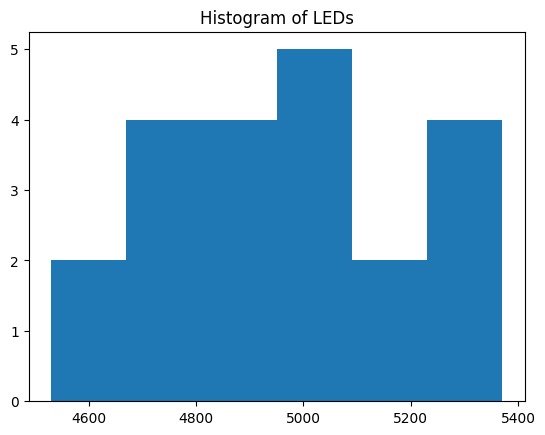

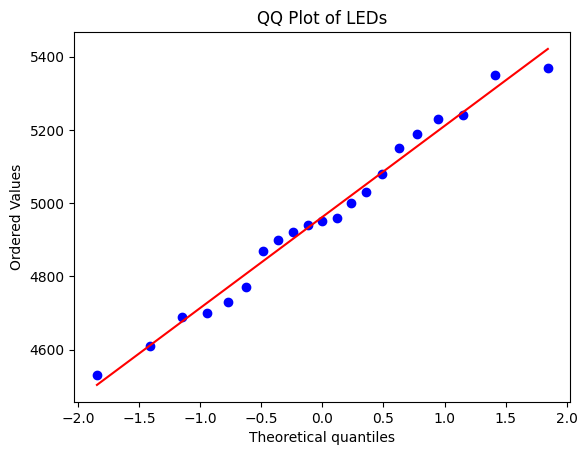

Shapiro-Wilk Test: W=0.9748423819996593, p-value=0.835941317255742
T-test: t-statistic=-0.15449041570423216, p-value=0.43938572634261397, df=20.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind

# Set the random seed
np.random.seed(5233)

# Generate the sample
leds = np.random.choice(np.arange(4500, 5510, 10), 21, replace=False)

# Check normality - histogram
plt.hist(leds, bins='auto')
plt.title('Histogram of LEDs')
plt.show()

# Check normality - QQ plot
stats.probplot(leds, dist="norm", plot=plt)
plt.title('QQ Plot of LEDs')
plt.show()

# Check normality - Shapiro-Wilk test
shapiro_test = stats.shapiro(leds)
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# T-test
t_stat, p_value, df = ttest_ind(leds, [5000], alternative='smaller')

# Reporting results
def report(results):
    print(f'T-test: t-statistic={results[0]}, p-value={results[1]}, df={results[2]}')

report((t_stat, p_value, df))

What is the final conclusion here???

Let's try to perform the power analysis.

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

effect_size = (np.mean(leds) - 5000) / np.std(leds, ddof=1)
print(effect_size)
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(leds), alpha=0.05, alternative='smaller')
print(f'Power of the test: {power}')

-0.15812598171775238
Power of the test: 0.12691598601824516


Ok, we may see the really poor power of this test. 
So what we need to change to increase the power significantly (i.e. 90%)?

In [3]:
required_n = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=0.05, alternative='smaller')
print(f'Required sample size for 90% power: {required_n}')

Required sample size for 90% power: 685.6804139018082


### Nonparametric approach

In case of small sample, unknown variance and quite skewed / not normal distribution of the variable (qqplots and Shapiro tests suggest rejection of normality) - we should use the less powerful substitute of t-tests: Wilcoxon Rank-based Test for 1 sample mean.

In [5]:
import numpy as np
from scipy.stats import wilcoxon

# Set the random seed
np.random.seed(5233)

# Generate the sample
leds = np.random.choice(np.arange(4500, 5510, 10), 21, replace=False)

# Calculate the differences from the hypothesized mean
differences = leds - 5000

# Filter out zero differences
non_zero_differences = differences[differences != 0]
print(non_zero_differences[:10])
# Perform the Wilcoxon test using normal approximation
if len(non_zero_differences) > 0:
    stat, p_value = wilcoxon(non_zero_differences, alternative='less', mode='approx')
    # Display the results
    print(f'Wilcoxon test: statistic={stat}, p-value={p_value}')

    # Conclusions
    if p_value < 0.05:
        print("We reject the null hypothesis: the mean value of 'leds' is less than 5000.")
    else:
        print("We do not have sufficient evidence to reject the null hypothesis.")
else:
    print("Not enough non-zero differences to perform the Wilcoxon test.")

[-310  -60 -270  240  -80  370  230 -100  -40  190]
Wilcoxon test: statistic=85.0, p-value=0.22759712672544208
We do not have sufficient evidence to reject the null hypothesis.


### Your turn

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

Please verify if the **mean delivery time for medium quality pizzas is significantly lower than 25 minutes**. Assume 0.01 level of significance. Check if the power of this test is satisfactory.

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

In [7]:
import pandas as pd
url = "https://raw.githubusercontent.com/kflisikowski/ds/refs/heads/master/data_pizza.csv"
data_pizza = pd.read_csv(url)
data_pizza.head()

,Unnamed: 0,index,date,week,weekday,area,count,rabate,price,operator,driver,delivery_min,temperature,wine_ordered,wine_delivered,wrongpizza,quality
0,1,1,2014-03-01,9.0,6.0,Camden,5.0,True,65.655,Rhonda,Taylor,20.0,53.0,0.0,0.0,False,medium
1,2,2,2014-03-01,9.0,6.0,Westminster,2.0,False,26.980,Rhonda,Butcher,19.6,56.4,0.0,0.0,False,high
2,3,3,2014-03-01,9.0,6.0,Westminster,3.0,False,40.970,Allanah,Butcher,17.8,36.5,0.0,0.0,False,NaN
3,4,4,2014-03-01,9.0,6.0,Brent,2.0,False,25.980,Allanah,Taylor,37.3,NaN,0.0,0.0,False,NaN
4,5,5,2014-03-01,9.0,6.0,Brent,5.0,True,57.555,Rhonda,Carter,21.8,50.0,0.0,0.0,False,medium


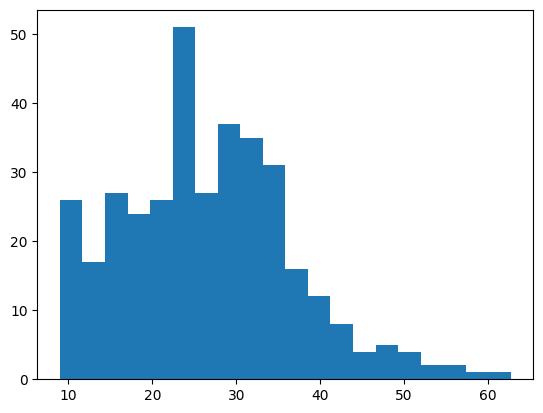

Wilcoxon = ShapiroResult(statistic=0.9766104000160752, pvalue=1.584592375465245e-05)


In [11]:
data = data_pizza[data_pizza["quality"]=="medium"]["delivery_min"]
mean = data.mean()
std = data.std()

alpha = 0.01

# Check for normality
plt.hist(data, bins=20)
plt.show()

wilcoxon_result = stats.shapiro(data)
print(f"Wilcoxon = {wilcoxon_result}")

In [14]:
# Normality assumption violated -> use Wilcoxon rank test
mean_hypothesis = 25
data_wilcoxon = data - mean_hypothesis
data_wilcoxon = data_wilcoxon[data_wilcoxon != 0]
stat, p_value = wilcoxon(data_wilcoxon, alternative='less', mode='approx')

print(f"P_value = {p_value}")
if p_value < alpha:
    print(f"We reject NULL hypothesis")
else:
    print(f"We do not reject NULL hypothesis")

P_value = 0.9819906990970108
We do not reject NULL hypothesis


In [18]:
effect_size = (np.mean(data) - mean_hypothesis) / np.std(data, ddof=1)
print(f"EF = {effect_size}")
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(data), alpha=alpha, alternative='smaller')
print(f'Power of the test: {power}')

EF = 0.15052499943085645
Power of the test: 7.4287976371068334e-06


## Tests for 1 Variance and SD

1-sample variance and SD tests are not so popular. 

In [19]:
import numpy as np
import scipy.stats as stats

# Student data
students = np.array([12, 15, 4, 9, 6, 7, 11, 10, 13, 10])

# Calculate sample standard deviation
sample_sd = np.std(students, ddof=1)
print(f'Sample standard deviation: {sample_sd}')

# Test parameters
sigma = 3
n = len(students)
alpha = 0.01

# Chi-squared test for standard deviation
chi2_stat = (n - 1) * (sample_sd ** 2) / (sigma ** 2)
p_value = stats.chi2.cdf(chi2_stat, df=n-1)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'p-value: {p_value}')

# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the standard deviation is less than 3.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Sample standard deviation: 3.3349995835415367
Chi-squared statistic: 11.122222222222224
p-value: 0.7325757902175853
We do not have sufficient evidence to reject the null hypothesis.


## Tests for 1 Proportion


### Exercise 3.

In case of large samples (np>5) we may use Z-tests for testing 1 proportions, but there is also Chi-square test for proportions (see below).

An auditor for the Online Service wants to examine its special two-hour priority order delivery to determine the proportion of the orders that actually arrive within the promised two-hour period. A randomly selected sample of 1500 such orders is found to contain 1150 that were delivered on time. 

Does the sample data provide evidence to conclude that **the percentage of on-time orders is more than 75%?** Test at 5% level of significance.

In [20]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

# Sample data
count = 1150  # Number of successes
nobs = 1500  # Number of observations
value = 0.75  # Hypothesized proportion

stat, p_value = proportions_ztest(count, nobs, value,alternative="larger")
print(f'Statistic: {stat}, p-value: {p_value}')
# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the proportion of on-time orders is greater than 75%.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Statistic: 1.5261692391684043, p-value: 0.06348386104600415
We do not have sufficient evidence to reject the null hypothesis.


Let's calculate the power for that test:

In [23]:
# import numpy as np
# import scipy.stats as stats
# from statsmodels.stats.power import NormalIndPower

p_hat = count/nobs
p0 = 0.75
# Calculate the effect size
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the power of the test
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='larger')

print(f'Power of the test: {power}')

Power of the test: 0.012536324238837755


Calculate the required sample size for the desired power - at least 90%:

In [24]:
import numpy as np
from statsmodels.stats.power import NormalIndPower

# Data
x = 1150  # number of orders delivered on time
n = 1500  # initial number of orders
p_hat = x / n  # proportion of orders delivered on time
p0 = 0.75  # hypothesized proportion
alpha = 0.05  # significance level
desired_power = 0.90  # desired power

# Calculate the effect size
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the required sample size for the desired power
power_analysis = NormalIndPower()
required_n = power_analysis.solve_power(effect_size=effect_size, power=desired_power, alpha=alpha, alternative='larger')

print(f'Required sample size for 90% power: {required_n:.0f}')

Required sample size for 90% power: 11561


If the sample is just too small (np<5) please use the original binomial distribution instead:

In [25]:
import numpy as np
import scipy.stats as stats

# Data
n = 1500  # number of orders
x = 1150  # number of orders delivered on time
p0 = 0.75  # hypothesized proportion
alpha = 0.05  # significance level

# Check if np < 5
if n * p0 < 5:
    # Use binomial test
    p_value = stats.binom_test(x, n, p0, alternative='greater')
    print(f'Binomial test p-value: {p_value}')
else:
    # Use Z-test
    p_hat = x / n  # proportion of orders delivered on time
    z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)
    p_value = 1 - stats.norm.cdf(z_stat)  # one-tailed test
    print(f'Z-statistic: {z_stat}')
    print(f'Z-test p-value: {p_value}')

# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the proportion of on-time orders is greater than 75%.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Z-statistic: 1.4907119849998645
Z-test p-value: 0.06801856405707118
We do not have sufficient evidence to reject the null hypothesis.


Now let's test the same hypothesis but with the Chi-square test statistic (contingency test). The only difference is that you need to deliver data in a form of a contingency table (might be an array):

In [ ]:
import statsmodels.stats.proportion as proportion
import numpy as np

orders_obs = 1150
orders_exp = 0.75*1500
sample_obs = 1500
sample_exp = 1500
orders = np.array([orders_obs, orders_exp])
sample_size = np.array([sample_obs,sample_exp])

chisq, pvalue, table = proportion.proportions_chisquare(orders, sample_size)
print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =1.137, pvalue = 0.286


As you can see - the p-value is higher than alpha as well so we do not have sufficient evidence to reject the null hypothesis!

### Your turn

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

Please test the claim **if the proportion of the high quality pizzas (when delivered) is significantly different from 0.5**. Assume significance level = 0.05.  

In [31]:
from statsmodels.stats.proportion import proportions_ztest
alpha_level = 0.05
high_amount = len(data_pizza[data_pizza["quality"]=="high"])
all_amount = len(data_pizza)
hypothesis_proportion = 0.5
z_stat, p_value = proportions_ztest(high_amount, all_amount, value=hypothesis_proportion)

if p_value < alpha_level:
    print("We reject null hypothesis")
else:
    print("We do not reject null hypothesis")

We reject null hypothesis


In [35]:
p_hat = high_amount/all_amount
p0 = hypothesis_proportion
# Calculate the effect size
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the power of the test
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=high_amount, alpha=alpha, alternative='two-sided')

print(f'Power of the test: {power}') # Type 2 error is about 0.2 then

Power of the test: 0.8069210486478469


In [34]:
print(f"Current sample size = {high_amount}")

Current sample size = 496



Please write down your conclusions here.
Perform the power analysis for this test and provide a sample size for a power = 90% if not achieved here.


In [37]:
p_hat = high_amount / all_amount
p0 = hypothesis_proportion 
desired_power = 0.90 
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the required sample size for the desired power
power_analysis = NormalIndPower()
required_n = power_analysis.solve_power(effect_size=effect_size, power=desired_power, alpha=alpha_level, alternative='two-sided')

print(f'Required sample size for 90% power: {required_n:.0f}')

Required sample size for 90% power: 652
